Two-layer climate model with interactive components
========

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import climate_model
import importlib
importlib.reload(climate_model)
model = climate_model.ClimateModel()
ui = climate_model.ClimateModelUI(model)
ui.display()

Output()

In [2]:
model.dT

,year,dTm,dTd
0,1750,0.000000,0.000000
1,1751,0.021871,0.000000
2,1752,0.038744,0.000153
3,1753,0.049981,0.000424
4,1754,0.055872,0.000772
...,...,...,...
265,2015,0.995305,0.050462
266,2016,1.045441,0.057088
267,2017,1.096326,0.064019
268,2018,1.142548,0.071258


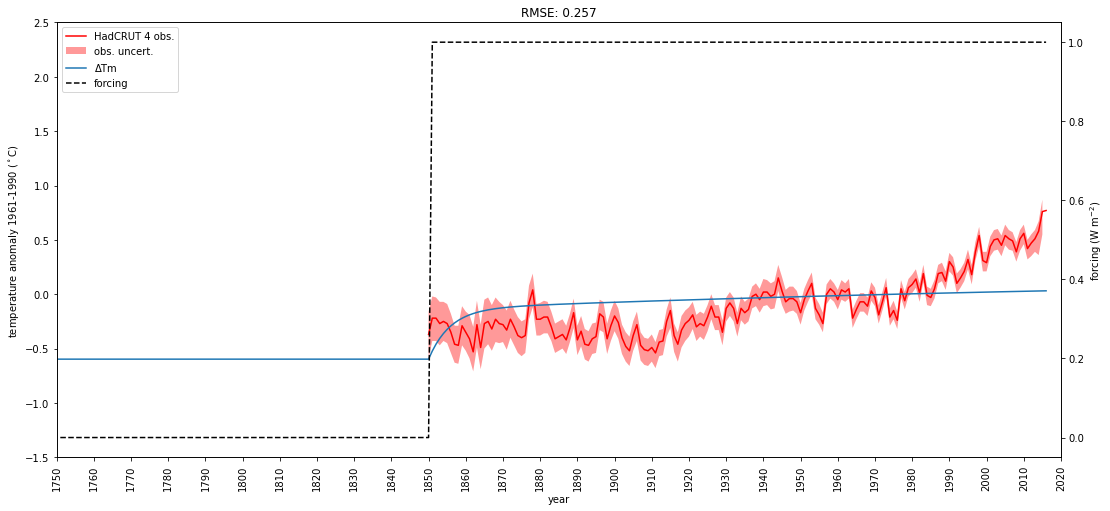

In [3]:
method = 'step'

if method == 'step':
    # Turn on forcing at 1850:
    total_forcing = np.zeros_like(model.forcings.year.loc[1:])
    total_forcing[100:] = 1
elif method == 'pulse':
    # Forcing pulse 1850-1859:
    total_forcing = np.zeros_like(model.forcings.year.loc[1:])
    total_forcing[100:110] = 3
elif method == '3xCO2':
    # 3x CO2 forcing:
    columns = [c for c in model.forcings.columns if c != 'year']
    forcings = model.forcings.copy()
    forcings['CO2'] *= 3
    total_forcing = forcings.loc[1:][columns].sum(axis=1)
else:
    raise Exception(f'Unknown method: {method}')

model.run_model(total_forcing=total_forcing)
model.plot(show_equilibrium=False)

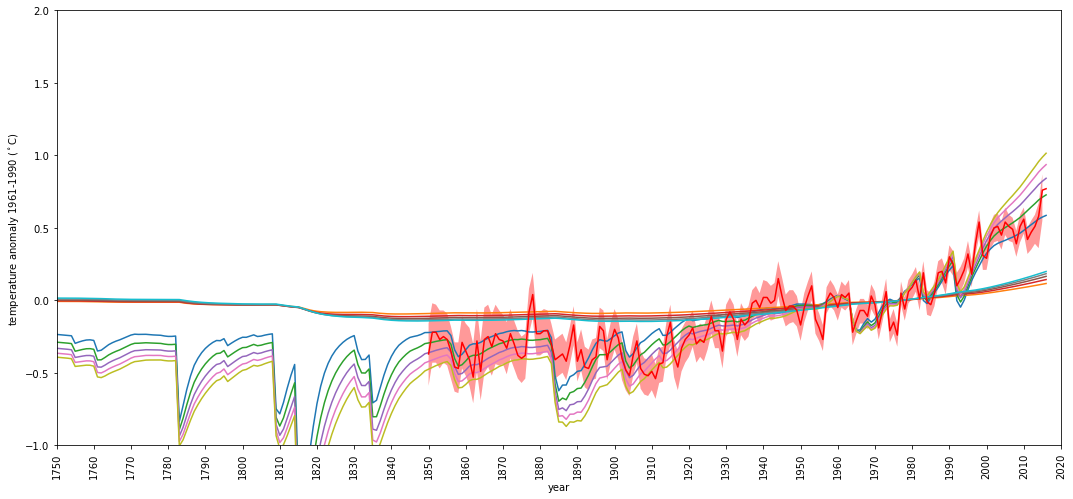

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches((18, 8))
for lam in np.linspace(0.4, 1, 5):
    model.run_model(lam=lam)
    model.plot(ax=ax, show_forcing=False)
model.base_plot(ax=ax)

In [27]:
model.forcings

,year,CO2,Other well mixed GHGs,Trop. O3,Strat. O3,Direct Sulphate Aerosol,Aerosol-Cloud Interactions,Biomass Burning Aerosol,Black & Organic Carbon Aerosol,Solar,Volcanic aerosols in Strat.
0,1750,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1751,-0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,0.00
2,1752,-0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,-0.03,0.00
3,1753,-0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,-0.03,0.00
4,1754,-0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,-0.04,0.00
...,...,...,...,...,...,...,...,...,...,...,...
262,2012,1.85,1.02,0.39,-0.04,-0.39,-0.44,0.01,0.26,0.05,-0.07
263,2013,1.88,1.03,0.39,-0.04,-0.38,-0.44,0.03,0.20,0.06,-0.04
264,2014,1.91,1.03,0.38,-0.03,-0.37,-0.43,0.05,0.15,0.08,0.00
265,2015,1.94,1.03,0.38,-0.03,-0.37,-0.43,0.05,0.15,0.03,0.00
